In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (8, 5)})

from tensorflow.keras import models, layers, optimizers, utils

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Dataset

In [ ]:
data = fetch_olivetti_faces()

images_dataset = data['images']
labels_dataset = data['target']

# images_dataset_part = images_dataset[:100]
# labels_dataset_part = labels_dataset[:100]

X = pd.DataFrame(images_dataset.reshape(images_dataset.shape[0], 64*64))
y = pd.Series(labels_dataset)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.3)

train_images = X_train.values.reshape(X_train.shape[0], 64, 64, 1)
test_images = X_test.values.reshape(X_test.shape[0], 64, 64, 1)

train_labels = y_train.values
test_labels = y_test.values

train_labels = utils.to_categorical(train_labels, num_classes=40)
test_labels = utils.to_categorical(test_labels, num_classes=40)

In [ ]:
def show_performance(h):
  fig, axes = plt.subplots(1, 2, figsize=(16, 5))
  axes[0].plot(h['loss'], label='Train loss')
  axes[0].plot(h['val_loss'], label='Val loss')

  axes[1].plot(h['accuracy'], label='Train accuracy')
  axes[1].plot(h['val_accuracy'], label='Test accuracy')

  axes[0].legend()
  axes[1].legend()

In [ ]:
def test_model(model, learning_rate=0.001, batch_size=64, epochs=100):
  opt = optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  
  model.summary()

  history = model.fit(train_images, train_labels,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0)
  show_performance(history.history)

  test_results = model.evaluate(test_images, test_labels, verbose=0)

  print('Test loss:      {:.4f}'.format(test_results[0]))
  print('Test accuracy:  {:.4f}'.format(test_results[1]))

### Model 1

In [ ]:
def create_model():
  model = models.Sequential()

  model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.5))

  model.add(layers.Conv2D(64, (5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.5))

  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.5))

  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(40, activation='softmax'))

  return model

In [ ]:
model_1 = create_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        25664     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 13, 13, 64)       

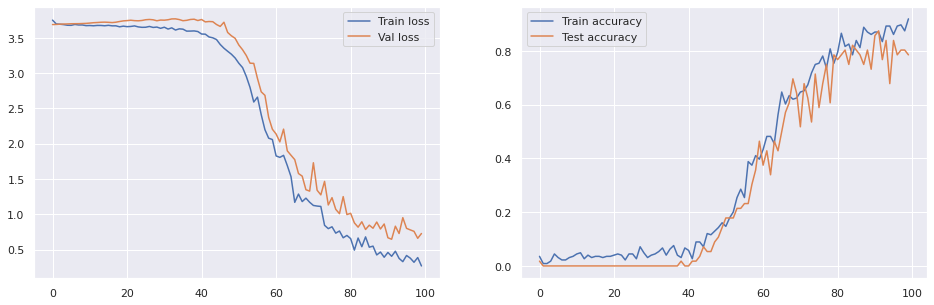

In [ ]:
test_model(model_1)

In [ ]:
predictions_1 = model_1.predict(test_images).argmax(axis=-1)

In [ ]:
print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       0.60      1.00      0.75         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      0.33      0.50         3
           9       1.00      0.67      0.80         3
          10       1.00      0.67      0.80         3
          11       0.38      1.00      0.55         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      0.67      0.80         3
          16       0.75      1.00      0.86         3
          17       1.00    

### Model 2

In [ ]:
def create_model():
  model = models.Sequential()

  model.add(layers.Conv2D(32, (5, 5), activation='tanh', input_shape=(64, 64, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.6))

  model.add(layers.Conv2D(32, (5, 5), activation='tanh'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.6))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='tanh'))
  model.add(layers.Dense(40, activation='softmax'))

  return model

In [ ]:
model_2 = create_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 60, 60, 32)        832       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 32)       

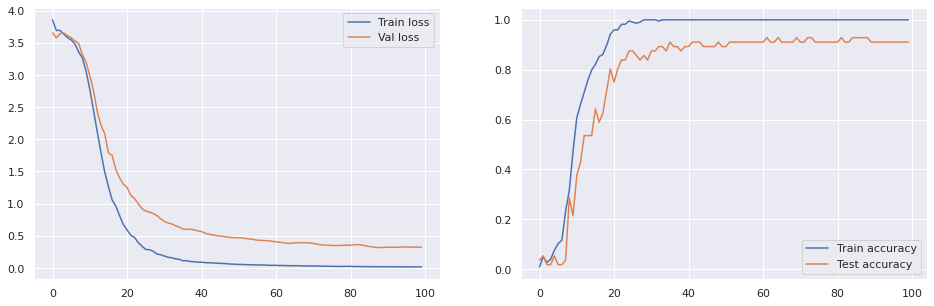

In [ ]:
test_model(model_2)

In [ ]:
predictions_2 = model_2.predict(test_images).argmax(axis=-1)

In [ ]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       0.60      1.00      0.75         3
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       0.75      1.00      0.86         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

### Model 3

In [ ]:
def create_model():
  model = models.Sequential()

  model.add(layers.Conv2D(32, (5, 5), activation='tanh', input_shape=(64, 64, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.6))

  model.add(layers.Conv2D(32, (5, 5), activation='tanh'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.6))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='tanh'))
  model.add(layers.Dense(40, activation='softmax'))

  return model

In [ ]:
model_3 = create_model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 60, 60, 32)        832       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 13, 13, 32)       

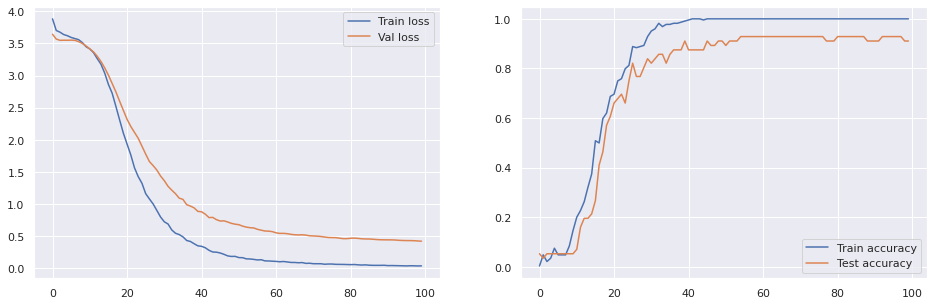

In [ ]:
test_model(model_3, learning_rate=0.001, batch_size=128)

In [ ]:
predictions_3 = model_3.predict(test_images).argmax(axis=-1)

In [ ]:
print(classification_report(y_test, predictions_3))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       0.75    

### Model 4

In [ ]:
def create_model():
  model = models.Sequential()

  model.add(layers.Conv2D(32, (5, 5), activation='tanh', input_shape=(64, 64, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(0.7))

  model.add(layers.Conv2D(32, (5, 5), activation='tanh'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.7))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='tanh'))
  model.add(layers.Dense(40, activation='softmax'))

  return model

In [ ]:
model_4 = create_model()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 60, 60, 32)        832       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 32)     

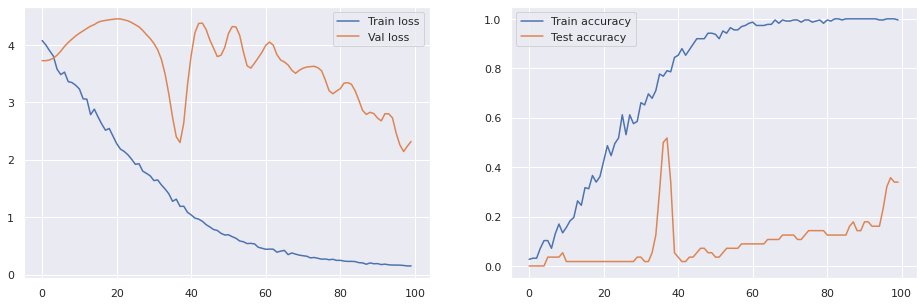

In [ ]:
test_model(model_4, learning_rate=0.001, batch_size=128)

In [ ]:
predictions_4 = model_4.predict(test_images).argmax(axis=-1)

In [ ]:
print(classification_report(y_test, predictions_4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         3
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         3
           9       1.00      0.33      0.50         3
          10       1.00      0.33      0.50         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       1.00      1.00      1.00         3
          14       1.00      0.33      0.50         3
          15       0.50      0.67      0.57         3
          16       1.00      0.33      0.50         3
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
